In [ ]:
#| hide
# from foundation.core import *

# Build stable diffusion from scratch

> Foundation of deep learning

Limits
- can't export and explain
- can't show code

Thanks to the internet.

## Install

```sh
pip install stable_diffusion_from_scratch
```

In [ ]:
from fastai.vision.all import *
from torch import optim
import torchvision

from foundation.unet import BasicUNet

In [ ]:
dataset = torchvision.datasets.MNIST(root="mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor())

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
path.ls()

(#2) [Path('/Users/study/.fastai/data/mnist_png/training'),Path('/Users/study/.fastai/data/mnist_png/testing')]

In [ ]:
dblock = DataBlock(blocks=(ImageBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(path, bs=64)

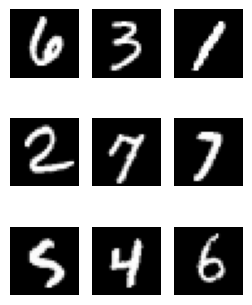

In [ ]:
dls.show_batch(max_n=9, figsize=(3, 4))

In [ ]:
for x in dls:
    print(x)

<fastai.data.core.TfmdDL object>
<fastai.data.core.TfmdDL object>


In [ ]:
prompt = "Seven"

In [ ]:
height, width = 64, 64
num_inference_steps = 30
guidance_scale = 5
batch_size = 1

##### Tokenzie the `prompt`

##### Create embedding matrix of the `prompt`

##### Do diffusion process

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = BasicUNet()

In [ ]:
loss_func = nn.MSELoss()

In [ ]:
opt = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
losses = []

In [ ]:
n_epochs = 1

##### How computer actually see an image?

Not like us (on the surface), computer see images by...

##### What is noise?

In [ ]:
def _corrupt(img_batch, amount):
    batch_size = img_batch.shape[0]
    noise = torch.randn_like(img_batch)
    amount = amount.view(batch_size, 1, 1, 1)
    
    return (1-amount) * img_batch + noise * amount

#| explain "noise = torch.randn_like(img_batch)"

Why use `.randn_like`? Because we add noise to an image by do pixel-wise addition.

#| explain "amount = amount.view(-1, 1, 1, 1)"

`amount` is a scale factor for how much noise. For example, if noise is `0.3`, amount is `0.1` then the actual noise is `0.3 x 0.1 = 0.03`. \n 

So to multiple a scalar to 

Because `img_batch` is a batch of `n` images, each image has size `3 x height x width`. So to add noise to all the pixels in three channels, we need to change the shape of `amount` to the same shape as an image.

In [ ]:
for epoch in range(n_epochs):
    for x_batch, y_batch in train_dataloader:
        
        batch_size = x.shape[0]
        
        x_batch = x_batch.to(device)
        noise_amount_batch = torch.rand(batch_size)
        #corrupted_x = corrupt(x, noise_amount)
        print(x_batch.shape)
        print(noise_amount_batch.shape)
        break

torch.Size([8, 1, 28, 28])
torch.Size([8])


In [ ]:
amount = torch.rand(8)

In [ ]:
amount.view(-1, 1, 1, 1).shape

torch.Size([8, 1, 1, 1])